In [130]:
import itertools

import pandas as pd
import geopandas as gpd

# Mappings and files

In [157]:
pct = lambda x: x/x.sum()

In [3]:
bayareafips_full = {'06001': 'Alameda County', '06013': 'Contra Costa County', '06041': 'Marin County', '06055': 'Napa County',
                    '06075': 'San Francisco County', '06081': 'San Mateo County', '06085': 'Santa Clara County',
                    '06097': 'Sonoma County', '06095': 'Solano County'}

bayareareg = dict([(k,'ABAG/MTC') for k in bayareafips_full])


In [4]:
# for halo counties, rely on the regionalization in
# http://www.cdss.ca.gov/research/res/pdf/multireports/RegionsofCalifornia.pdf


halofips = {'06077': 'San Joaquin', '06099': 'Stanislaus', '06067': 'Sacramento', '06047': 'Merced',
            '06113': 'Yolo', '06115': 'Yuba', '06101': 'Sutter', '06017': 'El Dorado', '06061': 'Placer',
            '06087': 'Santa Cruz', '06069': 'San Benito', '06053': 'Monterey',
            '06033': 'Lake', '06045': 'Mendocino'}

halotype = {'06077': 'Halo Southern Farm', '06047': 'Halo Southern Farm', '06033': 'Halo North and Mountains', '06045': 'Mendocino',
            '06045': 'Halo North and Mountains',
            '06099': 'Halo Southern Farm', '06067': 'Halo Central Valley',
            '06113': 'Halo Central Valley', '06115': 'Halo Central Valley', '06101': 'Halo Central Valley',
            '06017': 'Halo Central Valley', '06061': 'Halo Central Valley',
            '06087': 'Halo Southern Coast', '06069': 'Halo Southern Farm', '06053': 'Halo Southern Coast'}

bayareareg_w_halo = bayareareg | halotype
bayareareg_w_halo

{'06001': 'ABAG/MTC',
 '06013': 'ABAG/MTC',
 '06041': 'ABAG/MTC',
 '06055': 'ABAG/MTC',
 '06075': 'ABAG/MTC',
 '06081': 'ABAG/MTC',
 '06085': 'ABAG/MTC',
 '06097': 'ABAG/MTC',
 '06095': 'ABAG/MTC',
 '06077': 'Halo Southern Farm',
 '06047': 'Halo Southern Farm',
 '06033': 'Halo North and Mountains',
 '06045': 'Halo North and Mountains',
 '06099': 'Halo Southern Farm',
 '06067': 'Halo Central Valley',
 '06113': 'Halo Central Valley',
 '06115': 'Halo Central Valley',
 '06101': 'Halo Central Valley',
 '06017': 'Halo Central Valley',
 '06061': 'Halo Central Valley',
 '06087': 'Halo Southern Coast',
 '06069': 'Halo Southern Farm',
 '06053': 'Halo Southern Coast'}

In [5]:
cog_regions = {'06001': 'ABAG/MTC',
               '06013': 'ABAG/MTC',
               '06041': 'ABAG/MTC',
               '06053': 'AMBAG',
               '06055': 'ABAG/MTC',
               '06069': 'AMBAG',
               '06075': 'ABAG/MTC',
               '06073': 'SANDAG',
               '06081': 'ABAG/MTC',
               '06085': 'ABAG/MTC',
               '06087': 'AMBAG',
               '06095': 'ABAG/MTC',
               '06097': 'ABAG/MTC',
               '06077': 'SJCOG',
               '06099': 'STANCOG',
               '06047': 'MCAG',
               '06025': 'SCAG',  # imperial
               '06037': 'SCAG',   # LA
               '06071': 'SCAG',  # san bernadino
               '06059': 'SCAG',  # orange
               '06065': 'SCAG',  # riverside
               '06111': 'SCAG',  # ventura
               '06067': 'SACOG',  # 'yolo'
               '06101': 'SACOG',  # 'sutter'
               '06113': 'SACOG',  # 'yolo'
               '06115': 'SACOG'
               }  # 'yuba' }
# cog_regions.update(halotype)
cog_regions

{'06001': 'ABAG/MTC',
 '06013': 'ABAG/MTC',
 '06041': 'ABAG/MTC',
 '06053': 'AMBAG',
 '06055': 'ABAG/MTC',
 '06069': 'AMBAG',
 '06075': 'ABAG/MTC',
 '06073': 'SANDAG',
 '06081': 'ABAG/MTC',
 '06085': 'ABAG/MTC',
 '06087': 'AMBAG',
 '06095': 'ABAG/MTC',
 '06097': 'ABAG/MTC',
 '06077': 'SJCOG',
 '06099': 'STANCOG',
 '06047': 'MCAG',
 '06025': 'SCAG',
 '06037': 'SCAG',
 '06071': 'SCAG',
 '06059': 'SCAG',
 '06065': 'SCAG',
 '06111': 'SCAG',
 '06067': 'SACOG',
 '06101': 'SACOG',
 '06113': 'SACOG',
 '06115': 'SACOG'}

In [131]:
state_fips=pd.read_csv('../data/statefips.txt',dtype=str)
ca_geos = gpd.read_file('../data/ca_counties.shp')
#set(ca_geos.GEOID)-set(cog_regions.keys())
ca_geos.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,macroreg,cogreg,geometry
0,06,037,00277283,0500000US06037,06037,Los Angeles,Los Angeles County,CA,California,06,10513491099,1787501506,Southern California,SCAG,"MULTIPOLYGON (((129777.289 -503034.640, 130301..."
1,06,023,01681908,0500000US06023,06023,Humboldt,Humboldt County,CA,California,06,9241565229,1253726036,North Coast,None,"POLYGON ((-373865.773 278378.334, -372754.945 ..."
2,06,097,01657246,0500000US06097,06097,Sonoma,Sonoma County,CA,California,06,4080862341,498084088,Bay Area,ABAG,"POLYGON ((-306588.058 89313.140, -306210.097 8..."
3,06,079,00277304,0500000US06079,06079,San Luis Obispo,San Luis Obispo County,CA,California,06,8549172832,815618272,Central Coast,None,"POLYGON ((-121549.192 -246008.590, -112398.145..."
4,06,089,01682610,0500000US06089,06089,Shasta,Shasta County,CA,California,06,9778551576,186157964,Shasta Cascades,None,"POLYGON ((-260782.247 258918.819, -260645.840 ..."


## Prep county classification
Useful for larger comparisons - not used much

In [186]:
county_class = pd.read_excel(
    '../data/Rosetta_County.xlsx', index_col=[0, 1, 2, 3], engine='openpyxl')
county_class.index = county_class.index.set_names(
    ['CBSA_CODE', 'CBSA_Title', 'STCOUNTY', 'county_name'])
county_class = county_class.reset_index()
county_class = county_class.rename(columns={'Brookings': 'Bill Frey / Brookings Inst.',
                                            'Kolko': 'Jed Kolko / Indeed',
                                            'Yonder': 'Bill Bishop / Daily Yonder'})

for klass in ['Bill Frey / Brookings Inst.', 'Jed Kolko / Indeed', 'Bill Bishop / Daily Yonder']:
    county_class[klass] = county_class[klass].str.replace(' Counties', '').str.replace(
        'Rural Adjacent to Large', 'Rrl adj. to lg.')  # .apply(lambda x: '\n'.join(x))

county_class.STCOUNTY = county_class.STCOUNTY.apply(
    lambda x: '{:0>5}'.format(x))
county_class.CBSA_CODE = county_class.CBSA_CODE.apply(
    lambda x: '{:0>5}'.format(x))

klass_order = {'Bill Frey / Brookings Inst.': ['1-Urban Core', u'2-Mature Suburb', u'3-Emerging Suburb', u'4-Exurb',
                                               u'NonMetro', 'Rest of Counties'],
               'Jed Kolko / Indeed': [u'1-Urban', u'2-SuburbanHigh', u'3-SuburbanLow', 'Rest of Counties'],
               'Bill Bishop / Daily Yonder': [u'1-Central counties', u'2-Suburban', u'3-Exurban',
                                              u'4-Rrl adj. to lg. MSA', 'Rest of Counties']}

county_class['state'] = county_class.STCOUNTY.str.slice(
    0, 2).map(state_fips.set_index('FIPS').Name)
county_class['state_county'] = county_class.state+', '+county_class.county_name
county_class.head()

/Users/aolsen/opt/anaconda3/envs/geo_env_2/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,CBSA_CODE,CBSA_Title,STCOUNTY,county_name,Bill Frey / Brookings Inst.,Jed Kolko / Indeed,Bill Bishop / Daily Yonder,Population,Density,state,state_county
0,12060,"Atlanta-Sandy Springs-Marietta, GA",13013,Barrow County,4-Exurb,3-SuburbanLow,2-Suburban,80834,188,Georgia,"Georgia, Barrow County"
1,12060,"Atlanta-Sandy Springs-Marietta, GA",13015,Bartow County,3-Emerging Suburb,3-SuburbanLow,2-Suburban,106378,169,Georgia,"Georgia, Bartow County"
2,12060,"Atlanta-Sandy Springs-Marietta, GA",13035,Butts County,4-Exurb,3-SuburbanLow,3-Exurban,24192,50,Georgia,"Georgia, Butts County"
3,12060,"Atlanta-Sandy Springs-Marietta, GA",13045,Carroll County,4-Exurb,3-SuburbanLow,2-Suburban,117997,144,Georgia,"Georgia, Carroll County"
4,12060,"Atlanta-Sandy Springs-Marietta, GA",13057,Cherokee County,2-Mature Suburb,3-SuburbanLow,2-Suburban,253914,418,Georgia,"Georgia, Cherokee County"


# Load and combine data

In [134]:
# load 2020-2022 file - this counts change since April 1, 2020
popest2010s = pd.read_csv(
    '../data/co-est2020-alldata.csv', encoding='windows-1252')

# load 2010-2020 file - this counts change since April 1, 2010
popest2020s = pd.read_csv(
    '../data/co-est2022-alldata.csv')

# Drop all 2020-related columns - so we don't get the odd April 1, 2020 - June 30 2020 column
popest2020s = popest2020s[popest2020s.columns.difference(popest2020s.filter(regex='2020').columns)]

index_cols = ['SUMLEV', 'REGION', 'DIVISION',
              'STATE', 'COUNTY', 'STNAME', 'CTYNAME']

# combine the two
popest = pd.concat([popest2010s.set_index(index_cols),
                   popest2020s.set_index(index_cols)], axis=1).reset_index()

# add a state-county FIPS column
popest['STCOUNTY'] = popest.STATE.apply(lambda x: f'{x:02d}')+popest.COUNTY.apply(lambda x: f'{x:03d}')
popest['county_name'] = popest.CTYNAME.str.replace(' County','')

# keep only county summary levels - drops state summaries
popest = popest[popest.SUMLEV==50]

# add CA relevant regionalizations
popest['region'] = popest.STCOUNTY.map(cog_regions)
popest['region_2'] = popest.STCOUNTY.map(bayareareg_w_halo)

popest['macroreg']=popest.STCOUNTY.map(ca_geos.set_index('GEOID').macroreg)

## Add county classification

In [187]:
for klass in ['Bill Frey / Brookings Inst.','Jed Kolko / Indeed','Bill Bishop / Daily Yonder']:
    popest[klass]=popest.STCOUNTY.map(county_class.set_index('STCOUNTY')[klass])
    popest[klass]=popest[klass].fillna('Rest of Counties')
    popest[klass]=popest[klass].astype(pd.CategoricalDtype(categories=klass_order[klass],ordered=True))


In [188]:
# popest_class = popest.merge(county_class,on=['STCOUNTY'],how='left')
# popest_class.update(popest_class[[ 'Bill Frey / Brookings Inst.',
#        'Jed Kolko / Indeed', 'Bill Bishop / Daily Yonder']].fillna('NonMetro'))

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_49401/3271365998.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  popest.query('STATE==6').groupby(['Bill Frey / Brookings Inst.']).sum().filter(regex='POPEST').T.plot(kind='barh',stacked=True)


<AxesSubplot: >

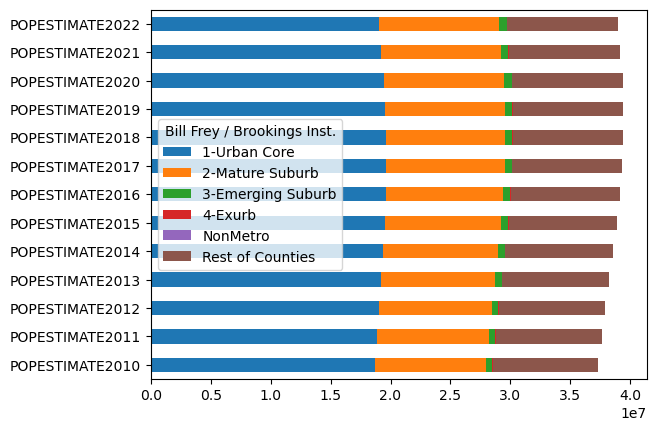

In [189]:
# high level summary - urban core grows a bit, then recedes again
popest.query('STATE==6').groupby(['Bill Frey / Brookings Inst.']).sum().filter(regex='POPEST').T.plot(kind='barh',stacked=True)

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_49401/3830366810.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  popest.groupby(['Bill Frey / Brookings Inst.'],group_keys=False).sum().filter(regex='POPEST').stack().groupby(level=1).apply(pct).unstack(0).plot(kind='barh',stacked=True)
/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_49401/3830366810.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  popest.groupby(['Bill Frey /

<AxesSubplot: >

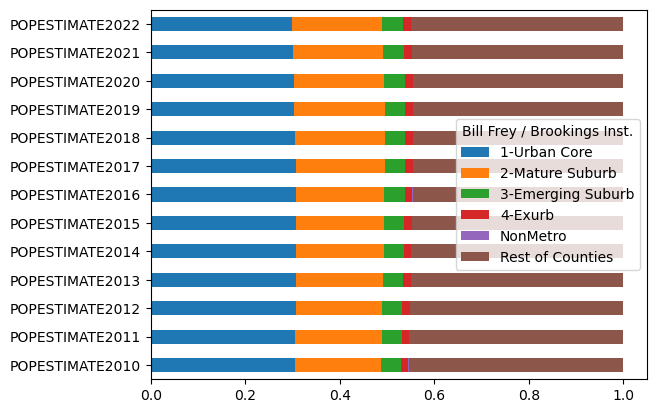

In [190]:
popest.groupby(['Bill Frey / Brookings Inst.'],group_keys=False).sum().filter(regex='POPEST').stack().groupby(level=1).apply(pct).unstack(0).plot(kind='barh',stacked=True)

# Get long form data

In [191]:
# these are the demographic variables we need, or the stubs of them
component_concepts = ['BIRTHS', 'DEATHS',
                      'INTERNATIONALMIG', 'DOMESTICMIG', 'RESIDUAL']

# these are the years we want to keep
years = map(lambda x: str(x), range(2011, 2023))
years_2 = list(map(lambda x: str(x), range(2012, 2023,2)))

# blend the two togehter
components = list(map(lambda x: ''.join(x), list(
    itertools.product(*[component_concepts, years]))))
components

['BIRTHS2011',
 'BIRTHS2012',
 'BIRTHS2013',
 'BIRTHS2014',
 'BIRTHS2015',
 'BIRTHS2016',
 'BIRTHS2017',
 'BIRTHS2018',
 'BIRTHS2019',
 'BIRTHS2020',
 'BIRTHS2021',
 'BIRTHS2022',
 'DEATHS2011',
 'DEATHS2012',
 'DEATHS2013',
 'DEATHS2014',
 'DEATHS2015',
 'DEATHS2016',
 'DEATHS2017',
 'DEATHS2018',
 'DEATHS2019',
 'DEATHS2020',
 'DEATHS2021',
 'DEATHS2022',
 'INTERNATIONALMIG2011',
 'INTERNATIONALMIG2012',
 'INTERNATIONALMIG2013',
 'INTERNATIONALMIG2014',
 'INTERNATIONALMIG2015',
 'INTERNATIONALMIG2016',
 'INTERNATIONALMIG2017',
 'INTERNATIONALMIG2018',
 'INTERNATIONALMIG2019',
 'INTERNATIONALMIG2020',
 'INTERNATIONALMIG2021',
 'INTERNATIONALMIG2022',
 'DOMESTICMIG2011',
 'DOMESTICMIG2012',
 'DOMESTICMIG2013',
 'DOMESTICMIG2014',
 'DOMESTICMIG2015',
 'DOMESTICMIG2016',
 'DOMESTICMIG2017',
 'DOMESTICMIG2018',
 'DOMESTICMIG2019',
 'DOMESTICMIG2020',
 'DOMESTICMIG2021',
 'DOMESTICMIG2022',
 'RESIDUAL2011',
 'RESIDUAL2012',
 'RESIDUAL2013',
 'RESIDUAL2014',
 'RESIDUAL2015',
 'RESIDUAL2016'

# Transform to long form data


In [ ]:
# needed for disambiguation
index_cols = ['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'region','region_2',
              'macroreg', 'county_name', 'STCOUNTY']


In [ ]:
stack_var_name = 'level_%s'%len(index_cols)

popest_long = popest.set_index(index_cols).stack().reset_index(name='value')
popest_long['year'] = popest_long[stack_var_name].str.extract('(\d{4})',expand=False)
popest_long['variable'] = popest_long[stack_var_name].str.replace(
        '(\d{4})', '')
popest_long = popest_long.drop([stack_var_name],axis=1)
popest_long = popest_long.dropna(subset=['macroreg'])

# switch sign of deaths - they should be counted as negatives
popest_long.loc[popest_long.variable=='DEATHS','value'] *=-1
popest_long.head()

# Summaries

## Bay Area county level summary


In [192]:
pd.options.display.float_format = '{:,.0f}'.format
bayareapop_components_long = popest_long.query('variable.isin(@component_concepts) & STCOUNTY.isin(@bayareafips_full)').groupby(['CTYNAME', 'variable', 'year']).value.sum()
bayareapop_components_long.unstack('year')[years_2]

year                                    2012   2014    2016    2018    2020  \
CTYNAME              variable                                                 
Alameda County       BIRTHS           18,978 19,494  19,582  18,337  18,186   
                     DEATHS           -9,204 -9,252  -9,566  -9,909 -11,948   
                     DOMESTICMIG       4,028  6,290  -6,168  -9,958 -16,777   
                     INTERNATIONALMIG  9,063 11,475  12,664   8,351   4,436   
                     RESIDUAL            -29    123     -73     -49      14   
Contra Costa County  BIRTHS           11,940 12,243  12,590  12,112  11,771   
                     DEATHS           -6,988 -7,227  -7,800  -8,047  -9,228   
                     DOMESTICMIG       4,560  6,444   3,517  -1,963  -4,664   
                     INTERNATIONALMIG  2,705  4,027   4,854   3,138   1,515   
                     RESIDUAL           -139    -75     -50     -23      56   
Marin County         BIRTHS            2,326  2,431   2,294   2,192   2,065   
                     DEATHS           -1,877 -1,876  -1,901  -1,997  -2,183   
                     DOMESTICMIG        -361    847  -1,379    -586  -1,892   
                     INTERNATIONALMIG    641    600     741     519     255   
                     RESIDUAL            -22    -40      -7     -12       2   
Napa County          BIRTHS            1,528  1,481   1,459   1,269   1,226   
                     DEATHS           -1,129 -1,166  -1,224  -1,285  -1,415   
                     DOMESTICMIG         273    370    -383  -1,206  -1,490   
                     INTERNATIONALMIG    190    148     166      23     -29   
                     RESIDUAL            -26    -24      -6       1      -5   
San Francisco County BIRTHS            8,782  8,950   8,995   8,673   8,547   
                     DEATHS           -5,543 -5,472  -5,694  -5,960  -6,898   
                     DOMESTICMIG       3,631    753  -1,361  -4,612 -15,926   
                     INTERNATIONALMIG  6,154  6,895   6,164   4,162   2,118   
                     RESIDUAL            245     97       2     -58     -61   
San Mateo County     BIRTHS            9,011  8,948   9,005   8,413   8,226   
                     DEATHS           -4,660 -4,516  -4,657  -4,819  -5,556   
                     DOMESTICMIG       2,833   -673  -6,878  -7,117 -10,815   
                     INTERNATIONALMIG  3,541  4,849   4,999   3,292   1,677   
                     RESIDUAL             30    -86     -20     -17     -34   
Santa Clara County   BIRTHS           23,420 23,414  23,285  21,795  21,070   
                     DEATHS           -9,307 -9,432 -10,108 -10,218 -12,110   
                     DOMESTICMIG      -1,556 -7,622 -21,023 -25,110 -31,149   
                     INTERNATIONALMIG 13,528 19,198  20,226  13,244   6,959   
                     RESIDUAL           -371   -322      28      23     -76   
Solano County        BIRTHS            5,066  5,255   5,175   5,103   5,023   
                     DEATHS           -2,920 -3,035  -3,224  -3,534  -3,953   
                     DOMESTICMIG         126  2,253   2,690     550  -1,690   
                     INTERNATIONALMIG  1,146    885     818     268     102   
                     RESIDUAL            -98    -21      -3     -10      19   
Sonoma County        BIRTHS            5,043  4,996   5,143   4,512   4,353   
                     DEATHS           -3,853 -3,995  -4,116  -4,187  -4,751   
                     DOMESTICMIG       1,314  2,846     146  -5,398  -2,058   
                     INTERNATIONALMIG    123    605     705      83     -53   
                     RESIDUAL            -74     -5     -31       8      10   

year                                     2022  
CTYNAME              variable                  
Alameda County       BIRTHS            17,295  
                     DEATHS           -11,040  
                     DOMESTICMIG      -33,191  
                     INTERNATIONALMIG  11,634 

## CA Macroregions


In [193]:
camacropop_components_long = popest_long.query('variable.isin(@component_concepts)').groupby(['macroreg', 'variable', 'year']).value.sum()
camacropop_components_long.to_csv('../output/camacropop_components_long_2020_2022.csv')
camacropop_components_long.unstack('year')[years_2]


year                                     2012     2014     2016     2018  \
macroreg            variable                                               
Bay Area            BIRTHS             86,094   87,212   87,528   82,406   
                    DEATHS            -45,481  -45,971  -48,290  -49,956   
                    DOMESTICMIG        14,848   11,508  -30,839  -55,400   
                    INTERNATIONALMIG   37,091   48,682   51,337   33,080   
                    RESIDUAL             -484     -353     -160     -137   
Central Coast       BIRTHS             18,959   18,475   18,280   16,947   
                    DEATHS             -9,450   -9,636  -10,154  -10,495   
                    DOMESTICMIG         2,738      466   -2,016   -6,048   
                    INTERNATIONALMIG    1,172    2,201    2,977      137   
                    RESIDUAL             -153     -110      -47        4   
Desert              BIRTHS              3,243    3,404    3,327    2,929   
                    DEATHS             -1,158   -1,230   -1,318   -1,314   
                    DOMESTICMIG        -1,309   -1,063   -1,735   -1,708   
                    INTERNATIONALMIG      -74      308      704      -30   
                    RESIDUAL               13       -2        2       10   
Gold Country        BIRTHS              7,937    8,068    7,960    7,920   
                    DEATHS             -6,583   -6,815   -7,382   -7,628   
                    DOMESTICMIG           662    4,693    8,017   10,725   
                    INTERNATIONALMIG      536      732      808      263   
                    RESIDUAL              -26      -69      -18      -25   
North Coast         BIRTHS              3,613    3,620    3,567    3,316   
                    DEATHS             -3,238   -3,293   -3,390   -3,317   
                    DOMESTICMIG        -1,626     -410      998      321   
                    INTERNATIONALMIG       20        4      184       16   
                    RESIDUAL              -15      -29       -8      -13   
Sacramento Valley   BIRTHS             23,844   24,136   24,175   23,418   
                    DEATHS            -12,766  -13,062  -13,750  -14,654   
                    DOMESTICMIG        -2,034    2,816    4,861      231   
                    INTERNATIONALMIG    4,312    6,146    7,071    4,243   
                    RESIDUAL             -271     -191      -46      -19   
San Joaquin Valley  BIRTHS             65,029   63,718   62,894   59,788   
                    DEATHS            -26,533  -27,306  -28,743  -30,494   
                    DOMESTICMIG       -17,579   -3,939   -9,233    3,896   
                    INTERNATIONALMIG    1,719    4,076    6,799      471   
                    RESIDUAL               16     -394      -65      -46   
Shasta Cascades     BIRTHS              6,327    6,583    6,449    6,236   
                    DEATHS             -6,134   -6,214   -6,632   -6,593   
                    DOMESTICMIG        -1,232       81    1,278    1,772   
                    INTERNATIONALMIG      307      546      498      254   
                    RESIDUAL              -33      -48      -22      -10   
Sierra Nevada       BIRTHS                754      781      743      746   
                    DEATHS               -835     -924     -942     -929   
                    DOMESTICMIG          -981     -173      193      333   
                    INTERNATIONALMIG       68      108      139       83   
                    RESIDUAL               22      -14       -3       -4   
Southern California BIRTHS            281,628  282,934  274,223  258,306   
                    DEATHS           -127,363 -129,593 -139,514 -144,800   
                    DOMESTICMIG       -34,787  -60,386  -93,744 -114,314   
                    INTERNATIONALMIG   50,410   65,172   68,246   29,852   
                    RESIDUAL           -2,977   -2,307     -317      -91   

year                                     2020  

## CA misc COG regions


In [194]:
cacogpop_components_long = popest_long.query('variable.isin(@component_concepts)').groupby(['region', 'variable', 'year']).value.sum()
cacogpop_components_long.to_csv('../output/cacogpop_components_long_2020_2022.csv')
cacogpop_components_long.unstack('year').sum(level=0).T#.plot()

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_49401/3135436801.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  cacogpop_components_long.unstack('year').sum(level=0).T#.plot()


region,ABAG/MTC,AMBAG,MCAG,SACOG,SANDAG,SCAG,SJCOG,STANCOG
year,,,,,,,,
2010,"14,245","2,408",912,"3,045","7,908","28,407","1,817",686
2011,"84,111","6,324","2,540","13,060","33,976","143,738","7,150","2,378"
2012,"92,068","5,917","1,527","13,711","37,912","129,755","5,179","2,821"
2013,"101,648","5,002","1,112","14,789","35,640","120,940","2,387","2,977"
2014,"101,078","4,420","2,353","20,355","38,519","118,786","9,465","4,501"
2015,"94,460","5,210","1,892","23,364","31,518","116,060","10,623","5,140"
2016,"59,576","5,233","1,237","22,851","24,637","85,437","10,743","6,032"
2017,"31,159","1,676","3,467","21,531","13,557","63,991","10,624","5,508"
2018,"9,993",-371,"2,896","14,208","13,464","15,301","9,304","3,361"


## Bay Area with "Halo" regions


In [195]:
bayarea2pop_components_long = popest_long.query('variable.isin(@component_concepts)').groupby(['region_2', 'variable', 'year']).value.sum()
bayarea2pop_components_long.to_csv('../output/bayareahalopop_components_long_2020_2022.csv')
bayarea2pop_components_long.unstack('year')[years_2]

year                                         2012    2014    2016    2018  \
region_2                 variable                                           
ABAG/MTC                 BIRTHS            86,094  87,212  87,528  82,406   
                         DEATHS           -45,481 -45,971 -48,290 -49,956   
                         DOMESTICMIG       14,848  11,508 -30,839 -55,400   
                         INTERNATIONALMIG  37,091  48,682  51,337  33,080   
                         RESIDUAL            -484    -353    -160    -137   
Halo Central Valley      BIRTHS            29,680  29,955  29,934  29,167   
                         DEATHS           -17,103 -17,565 -18,732 -19,798   
                         DOMESTICMIG          151   6,850  11,466   9,843   
                         INTERNATIONALMIG   4,879   6,831   7,815   4,554   
                         RESIDUAL            -300    -262     -56     -39   
Halo North and Mountains BIRTHS             1,850   1,825   1,729   1,701   
                         DEATHS            -1,666  -1,673  -1,764  -1,727   
                         DOMESTICMIG         -442     310    -195     195   
                         INTERNATIONALMIG     -55     -14      72     -41   
                         RESIDUAL             -21     -26      -8      -7   
Halo Southern Coast      BIRTHS             9,974   9,355   9,239   8,372   
                         DEATHS            -4,050  -4,106  -4,336  -4,394   
                         DOMESTICMIG         -795  -2,205  -2,001  -5,404   
                         INTERNATIONALMIG     305     828   1,368    -177   
                         RESIDUAL            -127     -23     -31       7   
Halo Southern Farm       BIRTHS            22,795  22,354  22,768  21,871   
                         DEATHS           -10,633 -10,966 -11,771 -12,148   
                         DOMESTICMIG       -2,582   4,033   4,942   6,406   
                         INTERNATIONALMIG     701   1,687   3,122     687   
                         RESIDUAL            -144    -218     -55     -30   

year                                         2020     2022  
region_2                 variable                           
ABAG/MTC                 BIRTHS            80,467   77,244  
                         DEATHS           -58,042  -53,936  
                         DOMESTICMIG      -86,461 -130,144  
                         INTERNATIONALMIG  16,980   47,534  
                         RESIDUAL             -75    1,467  
Halo Central Valley      BIRTHS            28,820   28,068  
                         DEATHS           -21,870  -21,979  
                         DOMESTICMIG        2,989   -5,707  
                         INTERNATIONALMIG   2,158    9,167  
                         RESIDUAL              84      188  
Halo North and Mountains BIRTHS             1,622    1,586  
                         DEATHS            -1,896   -1,919  
                         DOMESTICMIG         -530   -1,397  
                         INTERNATIONALMIG     -47      138  
                         RESIDUAL              -4      -21  
Halo Southern Coast      BIRTHS             8,201    7,810  
                         DEATHS            -4,988   -4,933  
                         DOMESTICMIG       -8,330   -4,945  
                         INTERNATIONALMIG    -286    1,084  
                         RESIDUAL             -16      468  
Halo Southern Farm       BIRTHS            21,955   21,788  
                         DEATHS           -13,320  -14,998  
                         DOMESTICMIG        1,430      248  
                         INTERNATIONALMIG     -42    3,250  
                         RESIDUAL              83     -315

# Sandboxed

In [52]:
def wide_to_long(df, index_level=['CTYNAME'], summary_level=['CTYNAME']):

    ix_len = len(index_level)
    
    region_county_string = df.groupby(summary_level).county_name.apply(lambda x: ', '.join(x))
    
    pop_components_long = df.set_index(index_level)[components].stack().groupby(
        level=summary_level+[ix_len]).sum()
    
    #pop_components_long['counties'] = region_county_string
    pop_components_long = pop_components_long.reset_index(name='value')
    
    pop_components_long['counties'] = pop_components_long[summary_level].iloc[:,0].map(region_county_string)
    pop_components_long['year'] = pop_components_long.level_1.str.extract(
        '(\d{4})', expand=False)
    pop_components_long['variable'] = pop_components_long.level_1.str.replace(
        '(\d{4})', '')
    pop_components_long.loc[pop_components_long.variable == 'DEATHS',
                            'value'] = pop_components_long.loc[pop_components_long.variable == 'DEATHS', 'value'] * -1
    return pop_components_long


bayareapop_components_long = wide_to_long(bayareapop,index_level=['CTYNAME'], summary_level=['CTYNAME'])
bayareapop_components_long

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_49401/4015293898.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  pop_components_long['variable'] = pop_components_long.level_1.str.replace(


,CTYNAME,level_1,value,counties,year,variable
0,Alameda County,BIRTHS2011,19222.0,Alameda,2011,BIRTHS
1,Alameda County,BIRTHS2012,18978.0,Alameda,2012,BIRTHS
2,Alameda County,BIRTHS2013,19471.0,Alameda,2013,BIRTHS
3,Alameda County,BIRTHS2014,19494.0,Alameda,2014,BIRTHS
4,Alameda County,BIRTHS2015,19494.0,Alameda,2015,BIRTHS
...,...,...,...,...,...,...
535,Sonoma County,RESIDUAL2018,8.0,Sonoma,2018,RESIDUAL
536,Sonoma County,RESIDUAL2019,-3.0,Sonoma,2019,RESIDUAL
537,Sonoma County,RESIDUAL2020,10.0,Sonoma,2020,RESIDUAL
538,Sonoma County,RESIDUAL2021,102.0,Sonoma,2021,RESIDUAL
